# Submodules

In this notebook, you will learn about
- The polynomial submodule: analyzing and building an approximation to existing data
- Random number generation and processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd

In notebooks [01_Intro](./01_Intro.ipynb) and [02_How_to_write_efficient_code](./02_How_to_write_efficient_code.ipynb), you looked at how to load the cost of living and quality of life data sets into NumPy and process the data. In this notebook, you will load this data into NumPy again to find the cost of living to get the greatest quality of life. You'll do this in three steps:

1. merge the "cost of living" and "quality of life" data based upon City
2. Plot the data and look for a trend
3. Create a polynomial fit to estimate the trend and calculate the maximum "quality of life" given "cost of living"


## 1. merge the "cost of living" and "quality of life" data based upon City

The two data sets have many of the same cities, but not all. First, you load the two data sets into two variable

- `cost_of_living`: the "cost of living" data set
- `quality_of_life`: the "quality of life" data set

In [2]:
cost_of_living = pd.read_csv('../data/Cost_of_living_index.csv')
quality_of_life = pd.read_csv('../data/quality_of_life_index.csv')

Now, you can `merge` the data sets into one based upon the `'City'`. 

In [4]:
merged_data = cost_of_living.merge(quality_of_life, how = 'inner', on = ['City'])
merged_data

,Rank_x,City,Cost of Living Index_x,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Rank_y,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index_y,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,2,"Zurich, Switzerland",128.65,62.62,97.39,127.35,127.14,142.39,7,192.97,112.95,83.34,74.43,128.33,8.52,34.93,18.00,81.48
1,6,"Geneva, Switzerland",118.33,69.16,95.06,112.08,119.78,133.47,18,184.01,104.75,73.05,73.18,119.58,9.67,25.49,25.28,82.61
2,7,"Reykjavik, Iceland",112.57,57.40,86.45,98.53,127.87,94.21,26,180.52,70.57,77.87,66.85,97.13,6.62,19.96,15.01,68.81
3,10,"Oslo, Norway",107.14,48.58,79.42,93.81,114.42,104.30,78,162.82,80.05,65.20,76.81,103.09,10.80,31.21,23.72,59.99
4,12,"New York, NY, United States",100.00,100.00,100.00,100.00,100.00,100.00,141,138.61,100.00,52.65,62.37,100.00,9.40,42.77,57.66,79.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,519,"Ahmedabad, India",24.24,5.19,15.22,24.89,17.40,70.18,194,108.79,34.67,66.81,65.74,26.43,10.55,38.43,73.19,49.27
238,521,"Karachi, Pakistan",23.90,6.15,15.50,20.89,18.57,36.66,229,83.98,28.44,46.75,57.31,21.34,14.48,41.93,89.84,71.32
239,524,"Hyderabad, India",23.59,5.99,15.26,23.02,17.35,78.00,185,113.82,47.08,56.59,65.10,26.71,8.96,42.95,76.13,73.54
240,529,"Mangalore, India",22.40,5.05,14.19,22.21,15.92,79.58,104,152.18,43.45,74.85,78.16,23.77,7.85,31.84,44.95,66.65


The merged data matches the City between `cost_of_living` and `quality_of_life` so each row now has both data sets. If a city was missing from either data set it was not included. 

## 2. Plot the data and look for a trend

Now, create 3 arrays with the data of interest:

- `city` is the city where the data was collected e.g. 'Oslo, Norway', 'New York, NY, United States'
- `cost_of_living` is the cost of living plus rent index for each city
- `quality_of_life` is the quality of life index measured for each city

In [6]:
city = merged_data['City'].values
cost_of_living = merged_data["Cost of Living Plus Rent Index"].values
quality_of_life = merged_data["Quality of Life Index"].values

Now, you can plot the `quality_of_life` vs the `cost_of_living` and label some cities of interest. Lets start off with 3 labels:

- city with highest `cost_of_living`
- city with highest `quality_of_life`
- city with minimum `cost_of_living`

In [15]:
max_cost_of_living = np.max(cost_of_living)
max_quality_of_life = np.max(quality_of_life)
min_cost_of_living = np.min(cost_of_living)

Text(0, 0.5, 'quality of life')

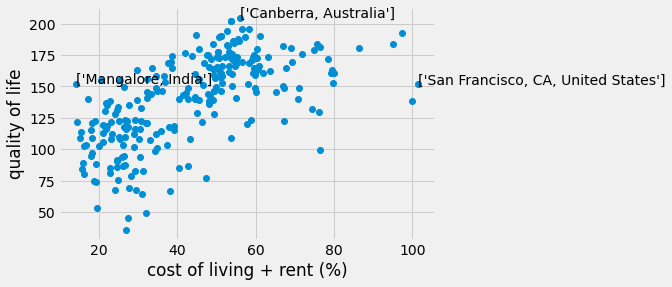

In [25]:
plt.plot(cost_of_living, quality_of_life, 'o')
plt.text(max_cost_of_living, quality_of_life[cost_of_living == max_cost_of_living], city[cost_of_living == max_cost_of_living])
plt.text(cost_of_living[quality_of_life == max_quality_of_life], 
         max_quality_of_life, 
         city[quality_of_life == max_quality_of_life])
plt.text(min_cost_of_living, 
         quality_of_life[cost_of_living == min_cost_of_living], 
         city[cost_of_living == min_cost_of_living])
plt.xlabel('cost of living + rent (%)')
plt.ylabel('quality of life')

Above, you have all of the 'quality of life' plotted vs the 'cost of living' for each city. There appears to be a maximum 'quality of life' in the 50-60 \% 'cost of living' index. Next, use the NumPy `polyfit` to create a polynomial to estimate this data set as a quadratic. 

## 3. Create a polynomial fit to estimate the trend and calculate the maximum "quality of life" given "cost of living"

Here, use the function, [`np.polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) to create a second-order polynomial fit to the 'quality of life' vs 'cost of living' measures. Use the function as such

```python
PP = np.polyfit(x_data, y_data, order)
```

where
- `PP` is the output array that has the polynomial coefficients, highest order first
- `x_data` are the x-axis values: 'cost of living' measurements
- `y_data` are the y-axis values: 'quality of life' measuremnts
- `order` is the polynomial degree: 2 for quadratic e.g. $y(x) = Ax^2 + Bx + C$

In [18]:
PP = np.polyfit(cost_of_living, quality_of_life, 2)
PP

array([-2.16733754e-02,  3.31281609e+00,  4.36270129e+01])

The output, `PP`, are the polynomial coefficients in an array with shape `(3, )`. One way to evaluate the polynomial at new values is to manually enter the formula as such

```python
x_values = np.linspace(10, 110, 50)
y_poly = PP[0]*x_values**2 + PP[1]*x_values + PP[2]
```

but, there is a better way! You can use the built-in NumPy function, [`np.polyval`](https://numpy.org/doc/stable/reference/generated/numpy.polyval.html) to specify the constants and pass the array of x values. 

```python
x_values = np.linspace(10, 110, 50)
y_poly = np.polyval(PP, x_values)
```

where

- `PP` is an array that has polynomial coefficents ordered from highest order to lowest $y(x) = PP_0 x^n + PP_1 x^{n-1} +...+PP_{n-1} x + PP_n$
- `x_values` is an array that will be evaluated at given `x` locations it can be a floating point number or a 1D array
- `y_poly` is the returned array evaluated at each `x_values` location given coefficients in `PP`

Here, define the `cost_values` to go from 10\% to 110\% with 50 steps and evaluate `quality_poly` at each cost. 

In [21]:
cost_values = np.linspace(10, 110, 50)
quality_poly = np.polyval(PP, cost_values)

The `quality_poly` is now a quadratic best-fit data set for the 'quality of life' given a 'cost of living' index. Plot the result to look for the maximum of the polynomial. 

Text(0, 0.5, 'quality of life')

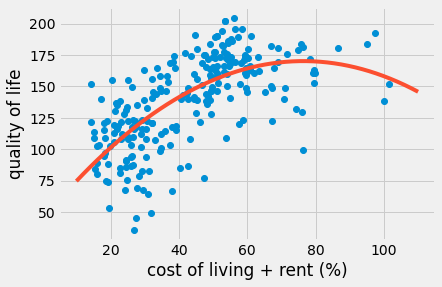

In [24]:
plt.plot(cost_of_living, quality_of_life, 'o')
plt.plot(cost_values, quality_poly)
plt.xlabel('cost of living + rent (%)')
plt.ylabel('quality of life')

This looks like a nice fit for the data, but __Where should I live?__

You will find some of the cities that are close to the optimium "cost of living". You will print out the cities as an array, then add some annotations to the plot you created above. Approach this in 3 steps:

1. find the optimum cost using `np.max()`
2. find all the "cost of living" values within 5\% of this optimum
3. print the cities and display four on the "quality of life" vs "cost of living" graph

First, assign the variable `optimum_cost` to the cost that results in the maximum polynomial result. 

In [58]:
optimum_cost = cost_values[quality_poly == quality_poly.max()]

The `quality_poly == quality_poly.max()` creates an array of `True`/`False` statements that are passed into `cost_values`. There is only one maximum value in `quality_poly` so `optimum cost` is an array with one value, shape is `(1, )`. 

Second, use the [`np.isclose`](https://numpy.org/doc/stable/reference/generated/numpy.isclose.html) to assign `optimum_bools` to an array of `True`/`False` statements to find
- `optimum_cities` the city names closest to the optimum quality of life
- `optimum_costs` the "cost of living" values closest to the optimum quality of life
- `optimum_quality` the "quality of life" values closest to the optimum quality of life

In [59]:
optimum_bools = np.isclose(cost_of_living, optimum_cost, atol=5)

optimum_cities = city[optimum_bools]
optimum_costs = cost_of_living[optimum_bools]
optimum_quality = quality_of_life[optimum_bools]

Third, you want to see which cities optimize "cost of living" to "quality of life". The list of cities in `optimum_cities` are the cities closest to the quadratic fit maximum "quality of life" measurements. Take a look at the list of names, "cost of living", and "quality of life" measures. 

> __Note__: Here you use a combination of `print` and string [`format`](https://docs.python.org/3.4/library/functions.html#format) work to get the data into a table. The `{:30s}` prints out a string that is always 30 characters long. This ensures the next column, "cost of living" is in the right location after the tab, `\t`. 



In [75]:
print('City:\t\t\tCost of living:\tQuality of life:')
for i in range(len(optimum_cities)):
    print('{:30s} \t {} \t {}'.format(optimum_cities[i], optimum_costs[i], optimum_quality[i]))

City:			Cost of living:	Quality of life:
Oslo, Norway                   	 79.42 	 162.82
Honolulu, HI, United States    	 79.63 	 152.59
Washington, DC, United States  	 79.87 	 161.11
Luxembourg, Luxembourg         	 74.76 	 178.91
Seattle, WA, United States     	 75.66 	 183.47
London, United Kingdom         	 76.1 	 129.89
Oakland, CA, United States     	 79.27 	 160.87
Boston, MA, United States      	 78.39 	 171.61
Los Angeles, CA, United States 	 74.25 	 132.26
San Jose, CA, United States    	 76.43 	 181.27
Hong Kong, Hong Kong           	 76.44 	 99.08


You can print out all of these city names on the plot, but it gets messy. Instead, use the `plt.text` to show every fourth city name (or 3 cities). Create the plot with the data and quadratic fit then use a `for`-loop to add the text for the cities. 

Text(0, 0.5, 'quality of life')

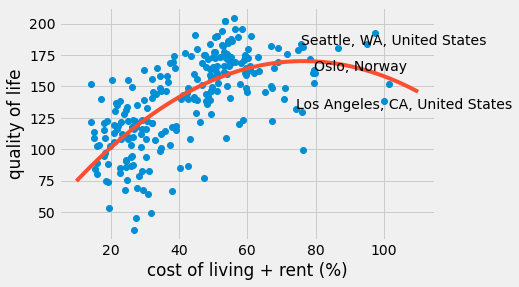

In [76]:
plt.plot(cost_of_living, quality_of_life, 'o')
plt.plot(cost_values, quality_poly)
for i in range(0, len(optimum_costs), 4):
    plt.text(optimum_costs[i], optimum_quality[i], optimum_cities[i])
plt.xlabel('cost of living + rent (%)')
plt.ylabel('quality of life')

So, if you're in the US it looks like Washington, DC (East coast) and Seattle, WA (West coast) are good options or in Europe Oslo, Norway is an optimal place to live too. 

## Read more
- [NumPy functions and methods overview](https://numpy.org/devdocs/user/quickstart.html#functions-and-methods-overview)
- [NumPy Quickstart guide](https://numpy.org/devdocs/user/quickstart.html)
- [NumPy for absolute beginners](https://numpy.org/devdocs/user/absolute_beginners.html)